In [ ]:
cd /content/drive/MyDrive/Git/ICT_Visual/Code

/content/drive/MyDrive/Git/ICT_Visual/Code


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
try :
    loaded_data = np.loadtxt('../Data/diabetes.csv',delimiter=',')
    
    x_data = loaded_data[:, 0:-1]
    t_data = loaded_data[:, [-1]]

    print(f'x_data.shape = {x_data.shape}')
    print(f't_data.shape = {t_data.shape}')

except Exception as err:

    print(str(err))

x_data.shape = (759, 8)
t_data.shape = (759, 1)


In [ ]:
print(x_data[:2])
print(t_data[:2])

s = np.arange(len(x_data)) # index 생성

# print(s)

np.random.shuffle(s)

# print(s)

x_data = x_data[s]
t_data = t_data[s]

print(x_data[:2])
print(t_data[:2])

In [ ]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO*len(x_data))

print('test_nums = ', test_nums)

x_test = x_data[:test_nums]
t_test = t_data[:test_nums]

x_data = x_data[test_nums:]
t_data = t_data[test_nums:]

print(x_data.shape, t_data.shape)
print(x_test.shape, t_test.shape)


test_nums =  75
(684, 8) (684, 1)
(75, 8) (75, 1)


In [ ]:
VAL_SPLIT_RATIO = 0.1

val_nums = int(VAL_SPLIT_RATIO*len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums]
t_val = t_data[:val_nums]

x_data = x_data[val_nums:]
t_data = t_data[val_nums:]

print(x_data.shape, t_data.shape)
print(x_val.shape, t_val.shape)


val_nums =  68
(616, 8) (616, 1)
(68, 8) (68, 1)


In [ ]:
model = Sequential()

model.add(Dense(t_data.shape[1], input_shape=(x_data.shape[1],), activation='sigmoid'))

In [ ]:
model.compile(optimizer=SGD(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist = model.fit(x_data, t_data, epochs=700, validation_data=(x_val, t_val), verbose=2)

In [ ]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5720 - accuracy: 0.6933


[0.5720462799072266, 0.6933333277702332]

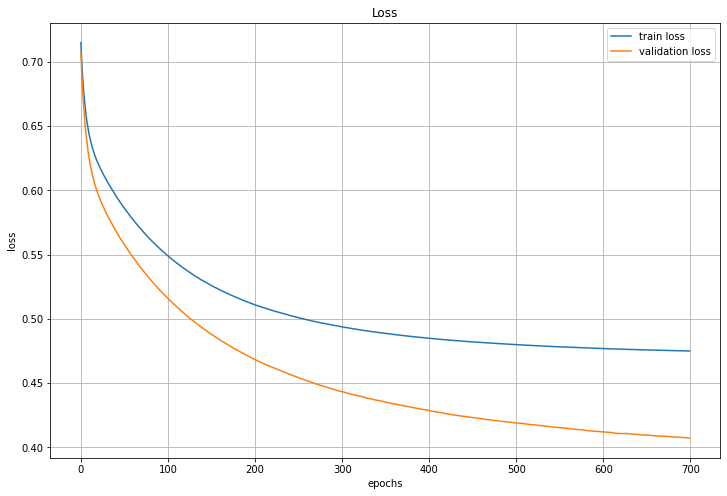

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')

plt.legend(loc='best')

plt.show()

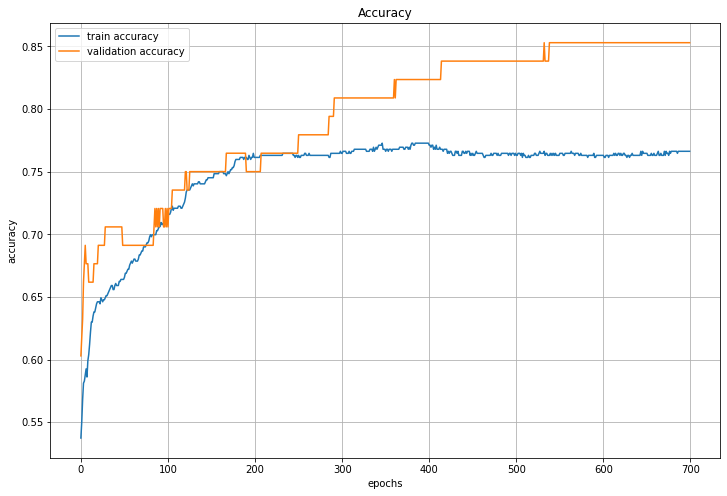

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')

plt.legend(loc='best')

plt.show()